In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

FILENAME = "series|KANAI_SUZUKI|Paths.PatchLogic[Paths.LINEAR, Paths.LOGISTIC, Paths.SATURATING]|2024-11-08/data.json"

# data = pd.read_json("../data/series|KANAI_SUZUKI|LINEAR|2024-11-07T17-18-26.037.json")

# data["ratio"] = data["p"] / data["pR"]

In [ ]:
with open("../data/" + FILENAME) as file:
    json_file = json.load(file)#, parse_float=lambda f: round(float(f), 2))
    data = pd.json_normalize(
        json_file,
        record_path=["snapshots"],
        meta=[
            ["settings", "maxCost"],
            ["settings", "patchImprovement"],
            ["settings", "patchRecovery"],
        ],
        meta_prefix=False,
    )

In [ ]:
data["pI"] = data["patchImprovement"]
data["pR"] = data["patchRecovery"]
data["ratio"] = data["pI"] / data["pR"]


In [ ]:
data.columns

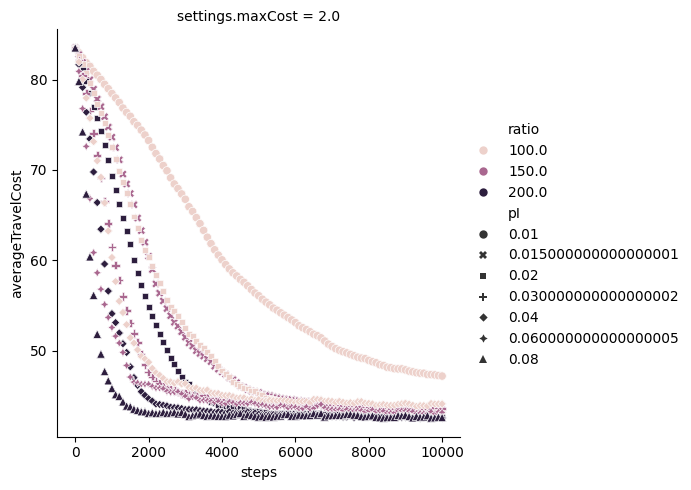

In [76]:
p = sns.relplot(
    data=data,
    x="steps", y="averageTravelCost", style="pI", hue="ratio", col="settings.maxCost", row="settings.patchRecovery",
)

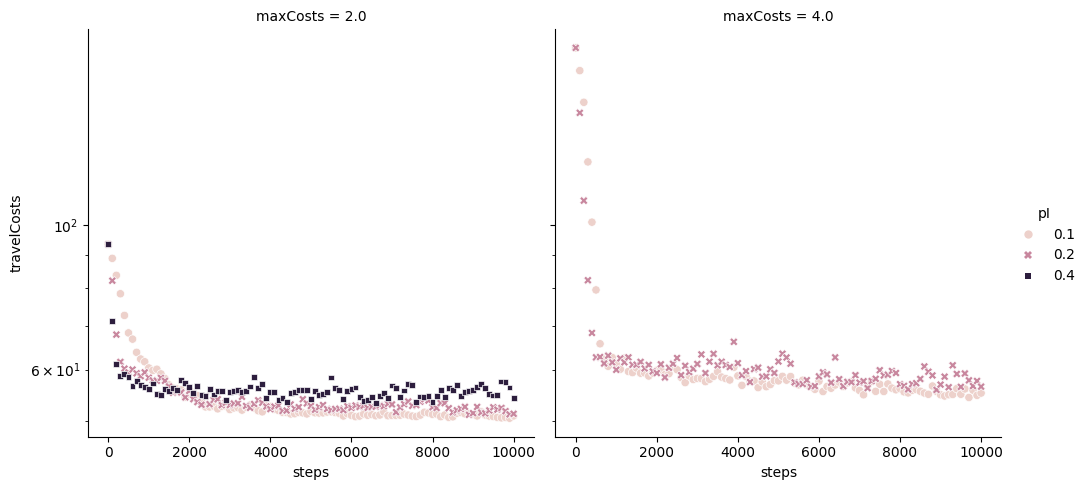

In [60]:
p = sns.relplot(
    data=data[data["ratio"] == 100],
    x="steps", y="travelCosts", style="pI", hue="pI", col="maxCosts"
)
plt.yscale('log')


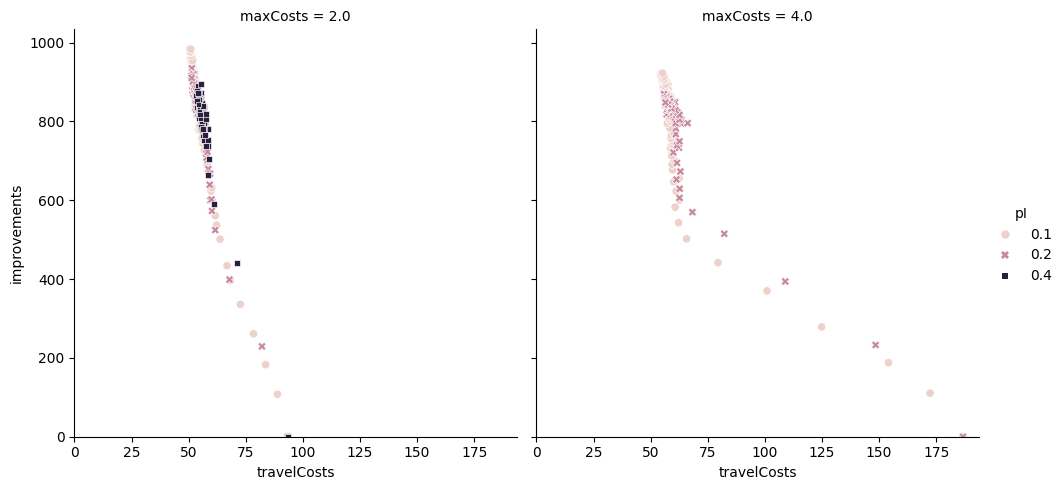

In [64]:
p = sns.relplot(data=data[data["ratio"]==100], x="travelCosts", y="improvements", style="pI", hue="pI", col="maxCosts")
p.set(xlim=(0, None), ylim=(0, None))

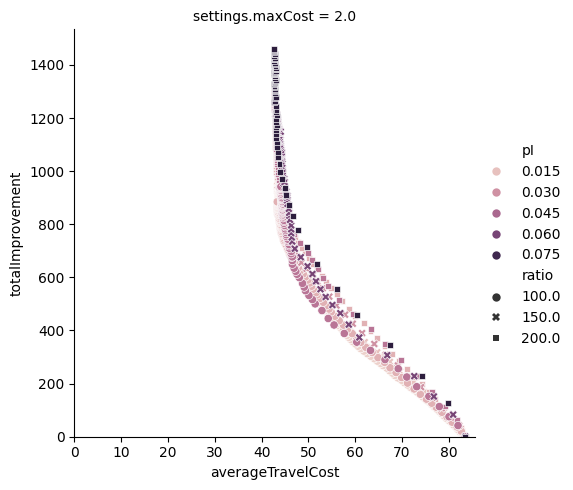

In [53]:
p = sns.relplot(data=data, x="averageTravelCost", y="totalImprovement", style="ratio", hue="pI", col="settings.maxCost")
p.set(ylim=(0, None), xlim=(0, None))

[(0.0, 1200.0), (0.0, 181.97337457520857)]

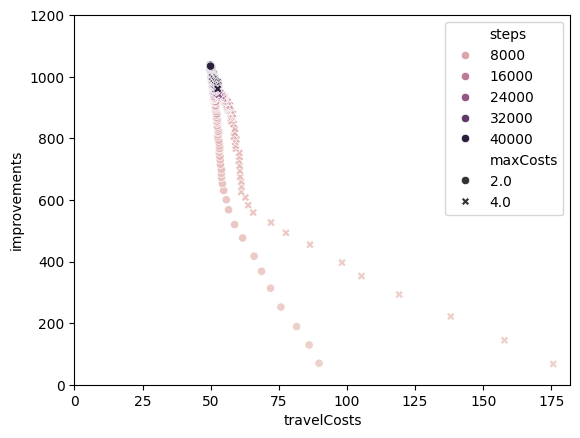

In [90]:
p = sns.scatterplot(
    data=data[(data["pI"]==0.04) & (data["pR"]==0.0004) & (data["steps"] > 0)],
    x="travelCosts", y="improvements", style="maxCosts", hue="steps")
p.set(ylim=(0, 1200), xlim=(0, None))


[(0.0, 1200.0), (0.0, 190.0)]

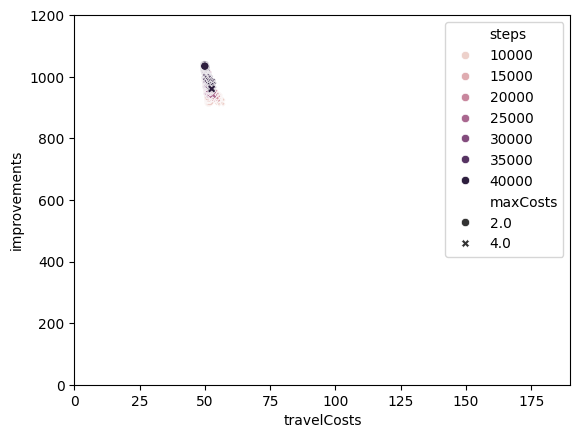

In [94]:
p = sns.scatterplot(
    data=data[(data["pI"]==0.04) & (data["pR"]==0.0004) & (data["steps"] >= 10000)],
    x="travelCosts", y="improvements", style="maxCosts", hue="steps")
p.set(ylim=(0, 1200), xlim=(0, 190))


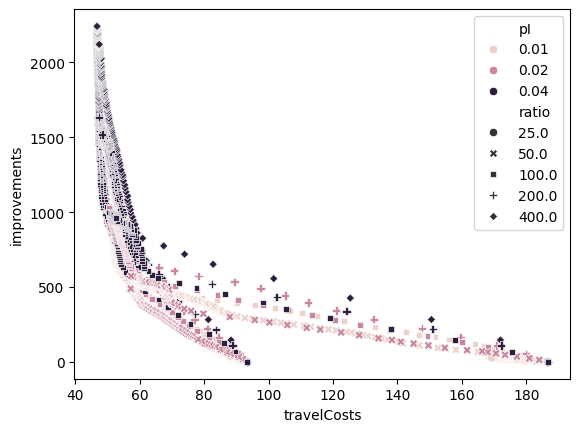

In [95]:
p = sns.scatterplot(data=data, x="travelCosts", y="improvements", style="ratio", hue="pI")

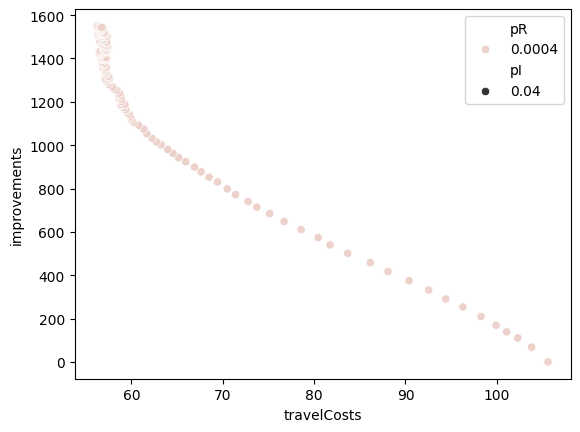

In [18]:
p = sns.scatterplot(data=data, x="travelCosts", y="improvements", hue="pR", style="pI")
# p.limit(x=(0, 120))